#### **Imports**

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import pandas as pd
from scipy.optimize import minimize
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Problem 1**

##### **Problem 1a**

In [47]:
def mass_to_temperature(mass):
    Temp = (1.057 * 10**13) / mass # Mass in [g]
    return Temp

def norm_neutrino_pdf(energy,mass,lower_limit,upper_limit):
    
    Temperature = mass_to_temperature(mass)
        
    lambda_function = lambda Ev: (np.exp(Ev / Temperature) - 1 ) / ( np.exp(Ev / Temperature) + 3 ) * ( 1  / ( np.exp(Ev / Temperature) + 1 ) )
    
    area , area_error = quad(lambda_function,lower_limit, upper_limit)
    
    scale = 1 / area
    
    return lambda_function(energy) * scale

In [48]:
BH_1 = 2.5 * 10**11 
BH_2 = 4. * 10**11 
BH_3 = 9. * 10**11 

Lower_energy , Upper_energy = 0 , 300 # Set limits of integration

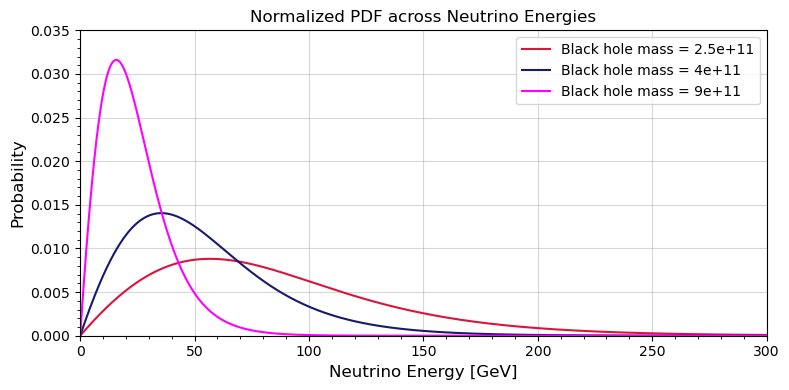

In [49]:
plt.figure(figsize = (8,4))

energy_range = np.linspace(Lower_energy,Upper_energy,2000) # From 0 GeV to 250 GeV

plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_1,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_1:.03}',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_2,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_2:.03}',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_3,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_3:.03}',linestyle='-')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Normalized PDF across Neutrino Energies',fontsize=12)
plt.xlabel('Neutrino Energy [GeV]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.xlim(Lower_energy,Upper_energy)
plt.ylim(0,0.035)
plt.legend(loc = 'best',frameon = True)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()

##### **Problem 1b**

In [50]:
df_neutrino = pd.read_csv('neutrino_energies.csv',header='infer')
df_neutrino.columns = ['Energies']
neutrino_energies = df_neutrino['Energies'].values

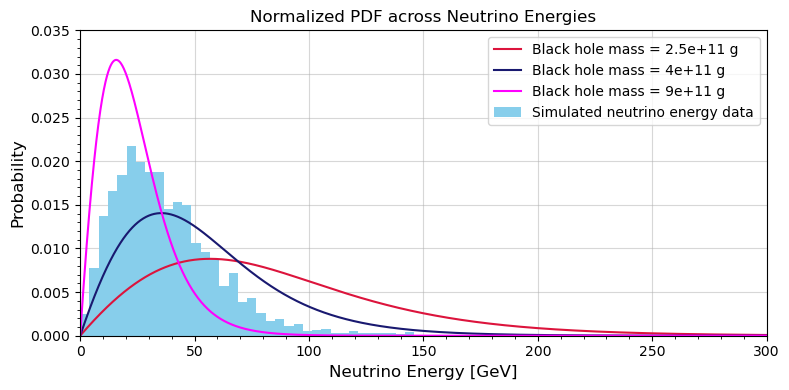

In [51]:
plt.figure(figsize = (8,4))

energy_range = np.linspace(Lower_energy,Upper_energy,2000) # From 0 GeV to 250 GeV

plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_1,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_1:.03} g',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_2,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_2:.03} g',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_3,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_3:.03} g',linestyle='-')
plt.hist(neutrino_energies,bins=np.linspace(0.,300.,75),density=True,color='skyblue',label = r'Simulated neutrino energy data')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Normalized PDF across Neutrino Energies',fontsize=12)
plt.xlabel('Neutrino Energy [GeV]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.xlim(Lower_energy,Upper_energy)
plt.ylim(0,0.035)
plt.legend(loc = 'best',frameon = True)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()

##### **Problem 1c**

In [52]:
def llh(data,mass):
    
    neutrino_pdf = norm_neutrino_pdf(data,mass,lower_limit=0,upper_limit=300)
    
    return np.sum( np.log( neutrino_pdf ) )

In [53]:
mass_range = np.linspace(4 * 10**11 , 9 * 10**11,2000)

BH_masses = []
BH_LLHs = []

for i in mass_range:
    
    LLH = llh(neutrino_energies,i) # Compute LLH given data and mass
    
    BH_masses.append(i) # Append the mass
    
    BH_LLHs.append(LLH) # Append the LLH

In [54]:
index_of_best_mass = np.argmax(BH_LLHs)
Best_Mass = BH_masses[index_of_best_mass]
Best_LLH =  BH_LLHs[index_of_best_mass]

In [55]:
print(f'Best mass is {Best_Mass:.10} g with an LLH-score of {Best_LLH:.06}')

Best mass is 5.745872936e+11 g with an LLH-score of -11252.8


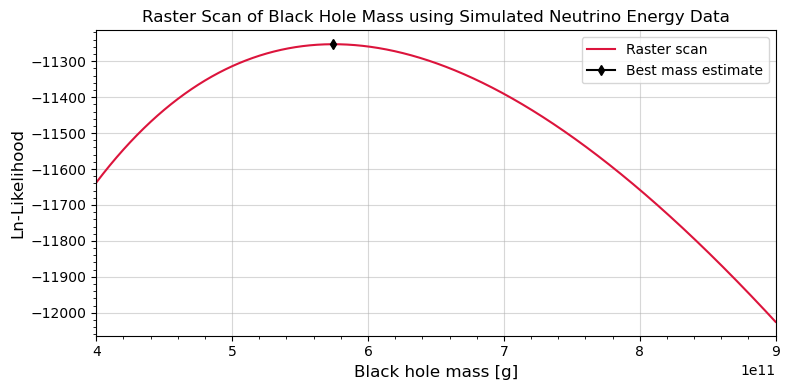

In [61]:
plt.figure(figsize = (8,4))

plt.plot(mass_range,BH_LLHs,
         label='Raster scan',linestyle='-')
plt.plot(Best_Mass,Best_LLH,marker='d',color='black',markersize=5,label='Best mass estimate')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Raster Scan of Black Hole Mass using Simulated Neutrino Energy Data',fontsize=12)
plt.xlabel('Black hole mass [g]',fontsize=12)
plt.ylabel('Ln-Likelihood',fontsize=12)
plt.xlim(4 * 10**11 , 9 * 10**11)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.legend(loc = 'best',frameon = True)
plt.tight_layout()

In [57]:
# Compute LLH at previous black hole masses
LLH_BH_1 = llh(neutrino_energies,BH_1)
LLH_BH_2 = llh(neutrino_energies,BH_2)
LLH_BH_3 = llh(neutrino_energies,BH_3)

print(f'For the first black mass, the LLH is {LLH_BH_1:.06}. For the second mass,\
 it is {LLH_BH_2:.06} and for the third mass, it is {LLH_BH_3:.06}')

For the first black mass, the LLH is -12970.1. For the second mass, it is -11637.6 and for the third mass, it is -12025.1


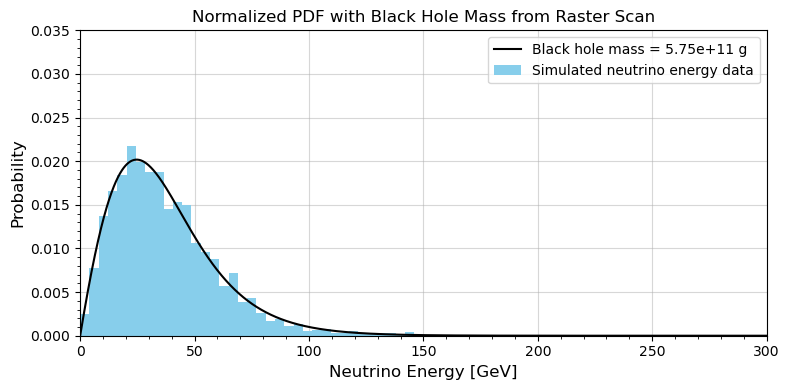

In [58]:
plt.figure(figsize = (8,4))

energy_range = np.linspace(Lower_energy,Upper_energy,2000) # From 0 GeV to 250 GeV

plt.plot(energy_range,norm_neutrino_pdf(energy_range,Best_Mass,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {Best_Mass:.03} g',linestyle='-',color='black')
plt.hist(neutrino_energies,bins=np.linspace(0.,300.,75),density=True,color='skyblue',label = r'Simulated neutrino energy data')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Normalized PDF with Black Hole Mass from Raster Scan',fontsize=12)
plt.xlabel('Neutrino Energy [GeV]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.xlim(Lower_energy,Upper_energy)
plt.ylim(0,0.035)
plt.legend(loc = 'best',frameon = True)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()

##### **Problem 1d**

In [59]:
def neg_llh(mass): # Function to be minimized, hence only mass
    
    mass = mass.copy() * 10**11
    
    neutrino_pdf = norm_neutrino_pdf(neutrino_energies,mass,lower_limit=0,upper_limit=300) 
    
    return -np.sum( np.log(neutrino_pdf))

In [60]:
res = minimize(neg_llh,x0=[6.],bounds=[(1,10)],method='L-BFGS-B') # We minimize in a much smaller regime

minimized_mass = res.x[0] # Get best mass
LLH_at_min = res.fun   # Get LLH at best mass

errors = np.sqrt(np.diag(res.hess_inv.todense()))[0] # Get the error

print(f'The best mass estimate using a minimizer was {minimized_mass:.7} with error {errors:.7} with a LLh of {-LLH_at_min:.6}')

The best mass estimate using a minimizer was 5.745852 with error 0.0705576 with a LLh of -11252.8
